In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [63]:
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}


In [64]:
X_train = []
y_train = []
X_test = []
y_test = []

# Assuming folders contains the names of activity folders
folders = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Map activity folders to numerical labels (ensure this matches your actual labels)
classes = {folder: idx + 1 for idx, folder in enumerate(folders)}

# Process the training data
dataset_dir = "../Combined_UCI/train"
for folder in folders:
    folder_path = dataset_dir + "/" + folder
    files = os.listdir(folder_path)

    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        X_train.append(df.values)
        y_train.extend([classes[folder]] * len(df))  # Append the label for all rows in the file

# Convert lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.array(y_train)

# Process the test data
dataset_dir = "../Combined_UCI/test"

for folder in folders:
    folder_path = dataset_dir + "/" + folder
    files = os.listdir(folder_path)

    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, sep=",", header=0)
        X_test.append(df.values)
        y_test.extend([classes[folder]] * len(df))  # Append the label for all rows in the file

# Convert lists to NumPy arrays
X_test = np.vstack(X_test)
y_test = np.array(y_test)

In [65]:
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)


Training data shape:  (7209, 561)
Testing data shape:  (3090, 561)


In [66]:
# apply PCA to get only 2 features from 561 features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Training data shape after PCA: ",X_train_pca.shape)
print("Testing data shape after PCA: ",X_test_pca.shape)

Training data shape after PCA:  (7209, 2)
Testing data shape after PCA:  (3090, 2)


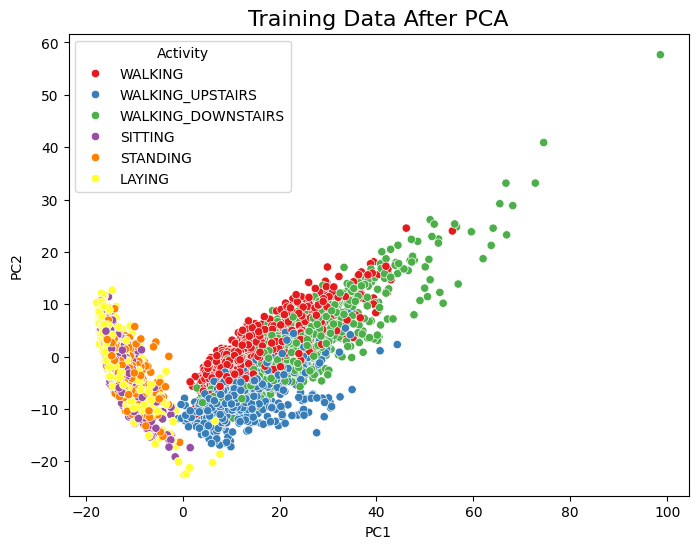

In [67]:
# plot the training data after PCA
df_train = pd.DataFrame(X_train_pca,columns=["PC1","PC2"])
df_train["Activity"] = y_train
df_train["Activity"] = df_train["Activity"].map({1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"})

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Activity", data=df_train, palette="Set1", hue_order=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"])
plt.title("Training Data After PCA", fontsize=16)
plt.show()